In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [2]:
# TASK 2: DATA COLLECTION

In [3]:
data_mat = pd.read_csv('student-mat.csv')
data_mat.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
data_por = pd.read_csv('student-por.csv')
data_por.head()
#print(data_por)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# TASK 3: DATA PREPARATION

In [6]:
# Remove any unnecessary attributes from the datasets.
data_mat_df = pd.DataFrame(data=data_mat)
data_por_df = pd.DataFrame(data=data_por)

#data_mat_updated = data_mat_df.drop(columns=['famsize','Pstatus','Mjob','Fjob','reason','guardian','famsup','activities','nursery','higher','freetime','goout','health','romantic','famrel'])
#data_por_updated = data_por_df.drop(columns=['famsize','Pstatus','Mjob','Fjob','reason','guardian','famsup','activities','nursery','higher','freetime','goout','health','romantic','famrel'])
#data_por_updated = data_por_df.drop(columns=['famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','nursery','higher','romantic','famrel'])

In [7]:
# Merge both datasets together.

data_merged = data_mat_df.merge(data_por_df, on=["school","sex","age","address",
                                                           "famsize","Pstatus","Medu","Fedu",
                                                          "Mjob","Fjob","reason","nursery",
                                                          "internet"],suffixes=('_mat', '_por'))


data_merged = data_merged.drop(columns=["nursery","famsize","Pstatus","reason","guardian_por","guardian_mat",
                                       "famrel_por","famrel_mat","romantic_por","romantic_mat","goout_por",
                                       "goout_mat","Mjob","Fjob","higher_por","higher_mat","paid_por",
                                       "paid_mat","famsup_por","famsup_mat","failures_por","failures_mat"])
#print(data_merged)
data_merged.head(20)

,school,sex,age,address,Medu,Fedu,traveltime_mat,studytime_mat,schoolsup_mat,activities_mat,...,schoolsup_por,activities_por,freetime_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,4,4,2,2,yes,no,...,yes,no,3,1,1,3,4,0,11,11
1,GP,F,17,U,1,1,1,2,no,no,...,no,no,3,1,1,3,2,9,11,11
2,GP,F,15,U,1,1,1,2,yes,no,...,yes,no,3,2,3,3,6,12,13,12
3,GP,F,15,U,4,2,1,3,no,yes,...,no,yes,2,1,1,5,0,14,14,14
4,GP,F,16,U,3,3,1,2,no,no,...,no,no,3,1,2,5,0,11,13,13
5,GP,M,16,U,4,3,1,2,no,yes,...,no,yes,4,1,2,5,6,12,12,13
6,GP,M,16,U,2,2,1,2,no,no,...,no,no,4,1,1,3,0,13,12,13
7,GP,F,17,U,4,4,2,2,yes,no,...,yes,no,1,1,1,1,2,10,13,13
8,GP,M,15,U,3,2,1,2,no,no,...,no,no,2,1,1,1,0,15,16,17
9,GP,M,15,U,3,4,1,2,no,yes,...,no,yes,5,1,1,5,0,12,12,13


In [8]:
# TASK 4: DATA EXPLORATION

In [9]:
data_merged.groupby(['sex']).describe()

Dalc_mat                                              Dalc_por            \
       count      mean       std  min  25%  50%  75%  max    count      mean   
sex                                                                            
F      198.0  1.262626  0.605991  1.0  1.0  1.0  1.0  5.0    198.0  1.267677   
M      184.0  1.701087  1.067554  1.0  1.0  1.0  2.0  5.0    184.0  1.701087   

    ...  traveltime_mat      traveltime_por                                \
    ...             75%  max          count      mean       std  min  25%   
sex ...                                                                     
F   ...             2.0  4.0          198.0  1.409091  0.644633  1.0  1.0   
M   ...             2.0  4.0          184.0  1.483696  0.753683  1.0  1.0   

                    
     50%  75%  max  
sex                 
F    1.0  2.0  4.0  
M    1.0  2.0  4.0  

[2 rows x 184 columns]

In [10]:
data_merged[data_merged['sex'] == 'F'].mean()

age               16.606061
Medu               2.696970
Fedu               2.515152
traveltime_mat     1.404040
studytime_mat      2.272727
freetime_mat       3.015152
Dalc_mat           1.262626
Walc_mat           1.964646
health_mat         3.388889
absences_mat       5.787879
G1_mat            10.459596
G2_mat            10.282828
G3_mat             9.838384
traveltime_por     1.409091
studytime_por      2.272727
freetime_por       3.030303
Dalc_por           1.267677
Walc_por           1.979798
health_por         3.383838
absences_por       3.717172
G1_por            12.545455
G2_por            12.691919
G3_por            13.085859
dtype: float64

In [11]:
data_merged[data_merged['sex'] == 'M'].mean()

age               16.565217
Medu               2.923913
Fedu               2.619565
traveltime_mat     1.483696
studytime_mat      1.777174
freetime_mat       3.445652
Dalc_mat           1.701087
Walc_mat           2.619565
health_mat         3.782609
absences_mat       4.815217
G1_mat            11.293478
G2_mat            11.173913
G3_mat            10.978261
traveltime_por     1.483696
studytime_por      1.788043
freetime_por       3.445652
Dalc_por           1.701087
Walc_por           2.625000
health_por         3.782609
absences_por       3.625000
G1_por            11.646739
G2_por            11.750000
G3_por            11.902174
dtype: float64

In [12]:
data_merged.head(5)
#data_merged.keys()

,school,sex,age,address,Medu,Fedu,traveltime_mat,studytime_mat,schoolsup_mat,activities_mat,...,schoolsup_por,activities_por,freetime_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,4,4,2,2,yes,no,...,yes,no,3,1,1,3,4,0,11,11
1,GP,F,17,U,1,1,1,2,no,no,...,no,no,3,1,1,3,2,9,11,11
2,GP,F,15,U,1,1,1,2,yes,no,...,yes,no,3,2,3,3,6,12,13,12
3,GP,F,15,U,4,2,1,3,no,yes,...,no,yes,2,1,1,5,0,14,14,14
4,GP,F,16,U,3,3,1,2,no,no,...,no,no,3,1,2,5,0,11,13,13


In [13]:
data_merged['sex'] = data_merged.apply(lambda row: 1 if (row['sex']=='F') else 0, axis = 1)
#data_merged.head(50)

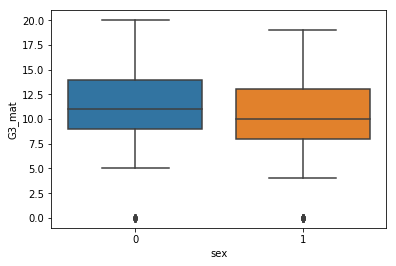

In [14]:
ax = sns.boxplot(y='G3_mat', x='sex', data=data_merged)

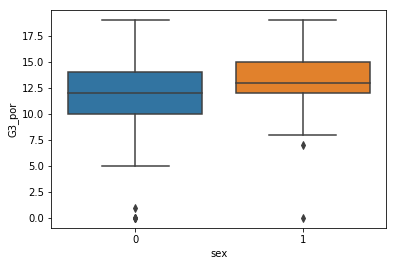

In [15]:
ax = sns.boxplot(y='G3_por', x='sex', data=data_merged)

In [16]:
#When looking at the final grades for both math and porteguese according to their gender. For math grades the males 
#had a better average final grade than the females. For the porteguese grades, the females had a higher average than the
#males. 

In [17]:
data_merged['activities_mat'] = data_merged.apply(lambda row: 1 if (row['activities_mat']=='yes') else 0, axis = 1)

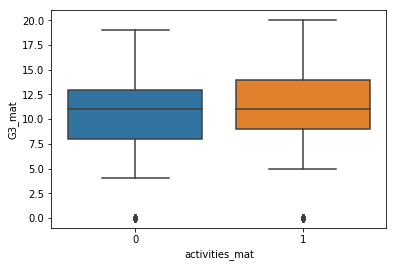

In [18]:
ax = sns.boxplot(y='G3_mat', x='activities_mat', data=data_merged)

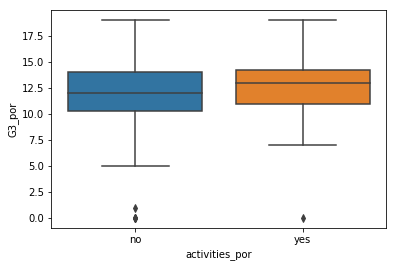

In [19]:
ax = sns.boxplot(y='G3_por', x='activities_por', data=data_merged)

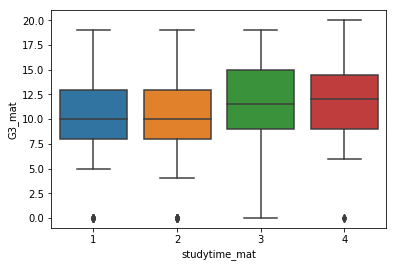

In [20]:
ax = sns.boxplot(y='G3_mat', x='studytime_mat', data=data_merged)

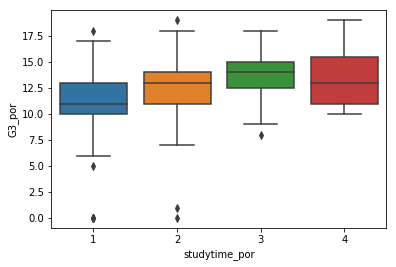

In [21]:
ax = sns.boxplot(y='G3_por', x='studytime_por', data=data_merged)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


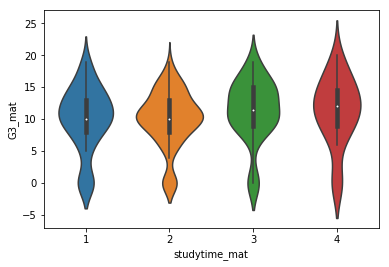

In [22]:
ax = sns.violinplot(x='studytime_mat', y='G3_mat', data=data_merged, ci=None)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


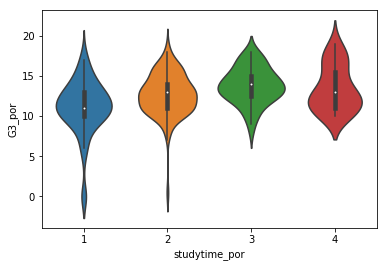

In [23]:
ax = sns.violinplot(x='studytime_por', y='G3_por', data=data_merged, ci=None)

In [24]:
data_merged['internet'] = data_merged.apply(lambda row: 1 if (row['internet']=='yes') else 0, axis = 1)

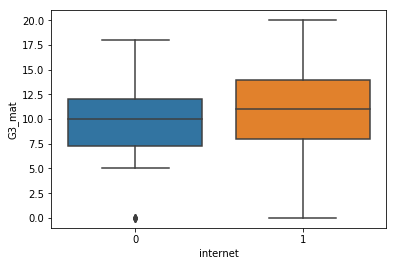

In [25]:
ax = sns.boxplot(y='G3_mat', x='internet', data=data_merged)

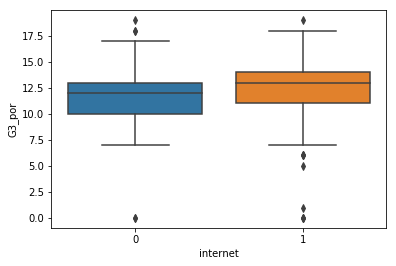

In [26]:
ax = sns.boxplot(y='G3_por', x='internet', data=data_merged)

In [27]:
data_merged_males = data_merged[data_merged['sex'] == 0]
data_merged_females = data_merged[data_merged['sex'] == 1]

(-1.1271387085047244,
 1.1012923194526059,
 -1.1005860724441208,
 1.1123075213265348)

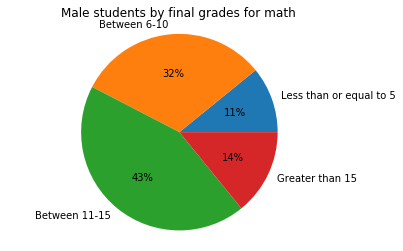

In [28]:
# Pie Chart for final math grade ranges for male students

a = data_merged_males[data_merged_males.G3_mat <= 5]['G3_mat'].count()
b = data_merged_males[(data_merged_males.G3_mat > 5) & (data_merged_males.G3_mat <= 10)]['G3_mat'].count()
c = data_merged_males[(data_merged_males.G3_mat > 10) & (data_merged_males.G3_mat <= 15)]['G3_mat'].count()
d = data_merged_males[data_merged_males.G3_mat > 15]['G3_mat'].count()
plt.pie([a, b, c, d], autopct='%1.0f%%', labels = ['Less than or equal to 5', 'Between 6-10', 
                                'Between 11-15', 'Greater than 15'])
plt.title('Male students by final grades for math')
plt.axis('equal')

(-1.122337174883346,
 1.1010636874613766,
 -1.1216140355772009,
 1.1169884601798985)

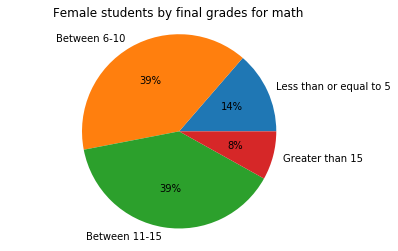

In [29]:
# Pie Chart for final math grade ranges for female students
a = data_merged_females[data_merged_females.G3_mat <= 5]['G3_mat'].count()
b = data_merged_females[(data_merged_females.G3_mat > 5) & (data_merged_females.G3_mat <= 10)]['G3_mat'].count()
c = data_merged_females[(data_merged_females.G3_mat > 10) & (data_merged_females.G3_mat <= 15)]['G3_mat'].count()
d = data_merged_females[data_merged_females.G3_mat > 15]['G3_mat'].count()
plt.pie([a, b, c, d], autopct='%1.0f%%', labels = ['Less than or equal to 5', 'Between 6-10', 
                                'Between 11-15', 'Greater than 15'])
plt.title('Female students by final grades for math')
plt.axis('equal')

In [30]:
#Attributes to use 
#Internet
#Studytime
#Activites
#sex

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data_mat[[ 'age','Medu','Fedu','traveltime', 'studytime','failures', 'famrel',
                                                              'freetime', 'goout','Dalc', 'Walc',"health", 'absences','G1', 'G2','G3']], data_mat['G3'], 
                                                    test_size = 0.25, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [32]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)
x_test_scale_df = pd.DataFrame(x_test_scale, columns=x_test.columns)
x_train_scale_df = pd.DataFrame(x_train_scale, columns=x_train.columns)

In [33]:

model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scale_df[[ 'age', 'Medu','Fedu','traveltime', 'studytime','failures', 'famrel','freetime',
                                                 'goout','Dalc', 'Walc',"health", 'absences','G1', 'G2']],
                         y = x_train_scale_df['G3'])
score = fitted_model.score(X = x_train_scale_df[[ 'age', 'Medu','Fedu','traveltime', 'studytime','failures', 'famrel','freetime',
                                                 'goout','Dalc', 'Walc',"health", 'absences','G1', 'G2']],
                           y = x_train_scale_df['G3'])
print(score)
print(fitted_model)
predicted = fitted_model.predict(X = x_test_scale_df[[ 'age', 'Medu','Fedu','traveltime', 'studytime','failures', 'famrel','freetime',
                                                 'goout','Dalc', 'Walc',"health", 'absences','G1', 'G2']])
print(predicted)
print(fitted_model.coef_)

0.8667354920170355
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 0.90715774  0.17470885 -0.12918381  1.19814325  1.42476824  0.36239437
  0.53734614  0.0822588  -0.52290503  1.03900528 -0.60401038  0.81133556
  0.25869046 -0.60902427  1.10877207  0.95370939  0.63572055 -0.28321589
 -0.19829639  1.09185672 -0.95511851 -1.55672538 -0.86748789  1.10460253
  0.33405877  1.39685441 -0.1932772   2.19768587 -2.42394271  0.6019067
 -2.63634902 -0.79805452 -0.53120403 -1.14569754  0.59579569 -0.08243391
  0.55314588  1.90322236 -0.4161394   0.31464271 -1.46231415  1.92899842
 -0.72873445 -0.44314386  0.00702654 -2.8055975   0.28013164 -1.46875895
  0.2454916  -0.59396256 -0.20010491  1.91233183  0.34068998 -0.69040582
  0.40550928 -0.53819416 -0.29972452  0.55306188  1.08386248  0.78729623
  0.62047956  0.59260489  0.82229912  1.18198172 -0.49963326  1.294844
  1.83323243  0.34124177 -1.52986678 -0.27527291 -0.33602415  0.77988397
 -0.79613313 -1.60362294  0.120

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data_merged[[ 'age','activities_mat','internet','sex','Fedu','traveltime_mat','traveltime_por',
                                                                 'studytime_mat', 'studytime_por','freetime_mat','freetime_por','Dalc_mat','Dalc_por',
                                                                 'Walc_mat', 'Walc_por','health_mat',"health_por",'absences_mat','absences_por',
                                                                 'G1_mat','G1_por','G3_mat','G3_por']], data_merged['school'], 
                                                    test_size = 0.25, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [35]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)
x_test_scale_df = pd.DataFrame(x_test_scale, columns=x_test.columns)
x_train_scale_df = pd.DataFrame(x_train_scale, columns=x_train.columns)

[[87  4]
 [ 5  0]]


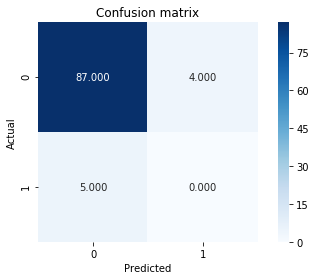

In [36]:
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train_scale, y_train)

y_pred = classifier.predict(x_test_scale)
#all_data_pred=classifier.predict(all_data)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [37]:
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.90625
0.09375
[0.94565217 0.        ]
[0.95604396 0.        ]
[0.95081967 0.        ]


In [38]:
#Classifying using Naive Bayes
classifier = GaussianNB()  
classifier.fit(x_train_scale, y_train)

GaussianNB(priors=None)

[[82  9]
 [ 4  1]]


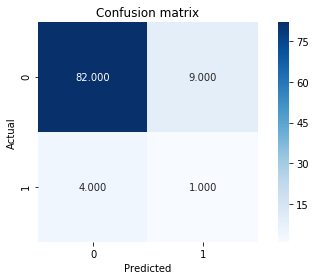

In [39]:
y_pred = classifier.predict(x_test_scale)
#all_data_pred=classifier.predict(all_data)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [40]:
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.8645833333333334
0.13541666666666663
[0.95348837 0.1       ]
[0.9010989 0.2      ]
[0.92655367 0.13333333]


In [41]:
# CLASSIFIER: Linear SVM
# Initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
# Predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

In [43]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[89  2]
 [ 4  1]]


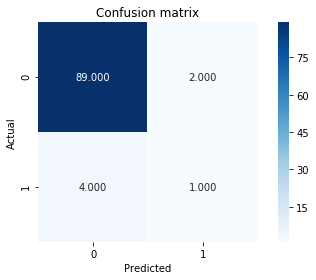

In [44]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [45]:
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.9375
0.0625
[0.95698925 0.33333333]
[0.97802198 0.2       ]
[0.9673913 0.25     ]


In [46]:
# CLASSIFIER: Kernel SVM
# Initialize kernel SVM classifier
classifier = SVC(kernel = 'poly') 
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
# Predict class labels using kernel SVM classifier
y_pred = classifier.predict(x_test)

In [48]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[85  6]
 [ 3  2]]


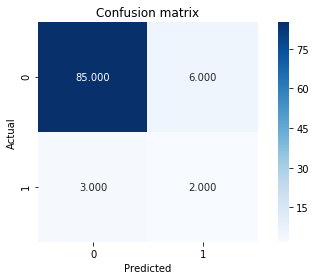

In [49]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [50]:
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.90625
0.09375
[0.96590909 0.25      ]
[0.93406593 0.4       ]
[0.94972067 0.30769231]
